/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


reject H0


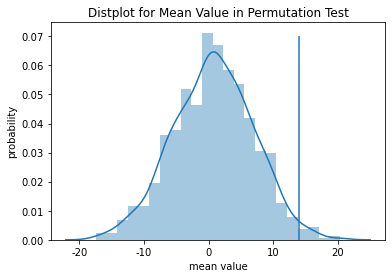

In [3]:
from scipy import stats
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

def create_statistic(data1,data2):
    return np.mean(data1) - np.mean(data2)


def permutation_procedure(data1,data2,rep_num):
    data = data1 + data2
    mean_value = []
    for j in range(rep_num):
        A = random.sample(data, len(data1))
        B = [i for i in data if i not in A]
        mean_diff = create_statistic(A, B)
        mean_value.append(mean_diff)

    return mean_value

def distplot_permutation(mean_value, test_statistic):
    sns.distplot(mean_value, hist=True, kde=True)
    plt.vlines(test_statistic, 0, 0.07)
    plt.title('Distplot for Mean Value in Permutation Test')
    plt.xlabel('mean value')
    plt.ylabel('probability')

def test_result(test_statistic, mean_value, rep_num):
    num = len([i for i in mean_value if i>=test_statistic])
    if num/rep_num <=0.05:
        return 'reject H0'
    else:
        return 'not reject H0'
def main():
    a_group=[24,43,58,67,61,44,67,49,59,52,62,50]
    b_group=[42,43,65,26,33,41,19,54,42,20,17,60,37,42,55,28]
    test_statistic = create_statistic(a_group,b_group)
    mean_value = permutation_procedure(a_group, b_group, 1000)
    distplot_permutation(mean_value,test_statistic)
    rs = test_result(test_statistic, mean_value, 1000)
    print(rs)

main();